In [54]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import feature_selection, linear_model

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [55]:
df_parent = pd.read_csv("DOCC.csv")

In [56]:
df.head()

,Market,Vertical,concat,count_days,days_tweeted,...,gifs_per_vit_per_day,total_tweets_w_video,video_per_vit,video_per_day,video_per_vit_per_day
0,AE,Books,AE|Books,41,40.0,...,6.13,139,46.33,3.48,1.16
1,AR,Books,AR|Books,41,41.0,...,0.05,54,13.5,1.32,0.33
2,AT,Books,AT|Books,41,32.0,...,0.16,0,0,0,0
3,AU,Books,AU|Books,41,41.0,...,0.03,20,1.43,0.49,0.03
4,BE,Books,BE|Books,41,40.0,...,0,1,0,0.03,0


In [57]:
df_topline_info = df_parent[['Market','Vertical' ,'count_days'  ,'days_tweeted', 'total_vits' , 'total_tweeting_vits' , 'total_tweets']]

In [58]:
df_account_activity = df_parent[['Market','Vertical','percent_days_tweeted' , 'tweets_per_day' , 'tweets_per_vit' , 'tweets_per_day_per_vit']]

In [59]:
len(df_topline_info.Market.unique())

199

In [60]:
df_topline_info.head()

,Market,Vertical,count_days,days_tweeted,total_vits,total_tweeting_vits,total_tweets
0,AE,Books,41.00,40.00,4.00,3.00,12956.00
1,AR,Books,41.00,41.00,4.00,4.00,3611.00
2,AT,Books,41.00,32.00,1.00,1.00,70.00
3,AU,Books,41.00,41.00,16.00,14.00,548.00
4,BE,Books,41.00,40.00,1.00,0.00,1074.00


In [98]:
df_topline_info.Vertical.unique()
#df_topline_info.total_vits.describe()

array(['Books', 'Vertical', 'Emerging Talent', 'Fashion Industry', 'Film',
       'Government & Politics', 'Movies, Books & Other Entertainment',
       'Music', 'News', 'Philanthropy', 'Sports', 'Television',
       'Video Games'], dtype=object)

In [99]:
len(df_topline_info.Market.unique())

199

In [74]:
#df_topline_info.dtype()


df_topline_info.dtypes[df.dtypes == 'object']

Market                  object
Vertical                object
count_days             float64
total_vits             float64
total_tweeting_vits    float64
total_tweets           float64
dtype: object

In [63]:
df_topline_info.days_tweeted = pd.to_numeric(df_topline_info.days_tweeted,'coerce')

In [64]:
df_topline_info.days_tweeted.isnull().sum()

1

In [65]:
df_topline_info.columns

Index([u'Market', u'Vertical', u'count_days', u'days_tweeted', u'total_vits',
       u'total_tweeting_vits', u'total_tweets'],
      dtype='object')

In [66]:
df_topline_info.count_days = pd.to_numeric(df_topline_info.count_days,'coerce')

In [67]:
df_topline_info.count_days.isnull().sum()

1

In [68]:
df_topline_info.total_vits = pd.to_numeric(df_topline_info.total_vits,'coerce')

In [69]:
df_topline_info.total_vits.isnull().sum()

1

In [70]:
df_topline_info.total_tweeting_vits = pd.to_numeric(df_topline_info.total_tweeting_vits,'coerce')

In [71]:
df_topline_info.total_tweeting_vits.isnull().sum()

1

In [72]:
df_topline_info.total_tweets = pd.to_numeric(df_topline_info.total_tweets,'coerce')

In [73]:
df_topline_info.total_tweets.isnull().sum()

1

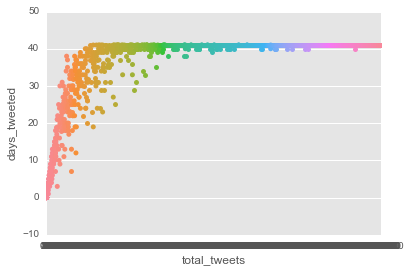

In [76]:
sns.stripplot(x="total_tweets", y="days_tweeted", data=df_topline_info);


In [77]:
df_topline_info.head()

,Market,Vertical,count_days,days_tweeted,total_vits,total_tweeting_vits,total_tweets
0,AE,Books,41.0,40.0,4.0,3.0,12956.0
1,AR,Books,41.0,41.0,4.0,4.0,3611.0
2,AT,Books,41.0,32.0,1.0,1.0,70.0
3,AU,Books,41.0,41.0,16.0,14.0,548.0
4,BE,Books,41.0,40.0,1.0,0.0,1074.0


# Tweets Distribution across verticals

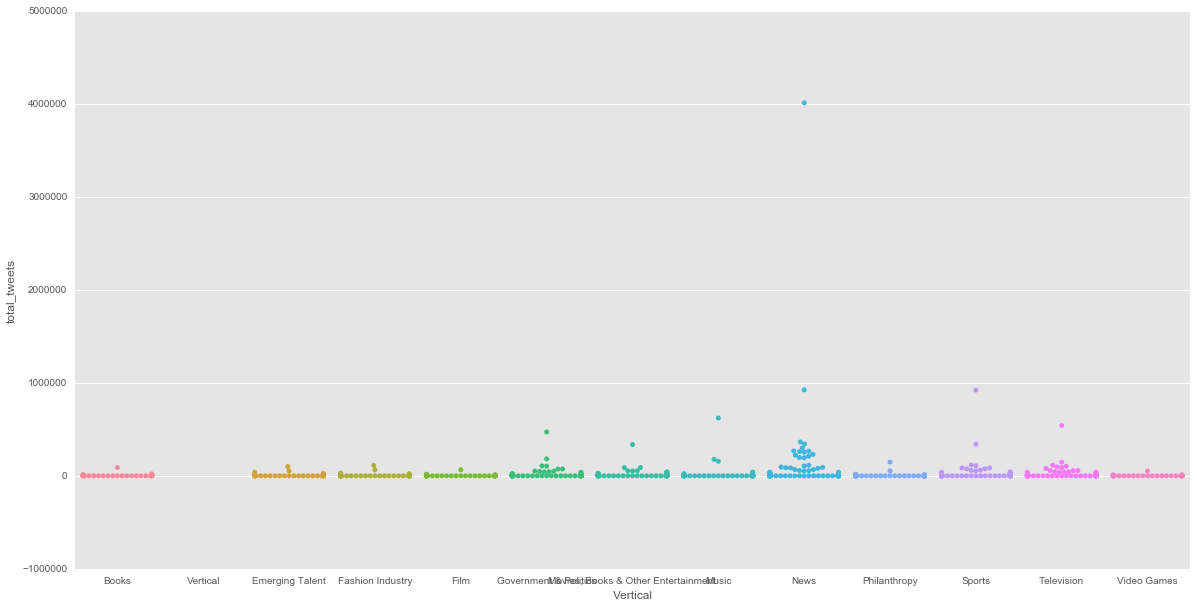

In [108]:
plt.figure(figsize=(20,10))

sns.swarmplot(x="Vertical", y="total_tweets", data=df_topline_info);

# Checking for range and distribution across Vertical
Notice the Huge outlier for News

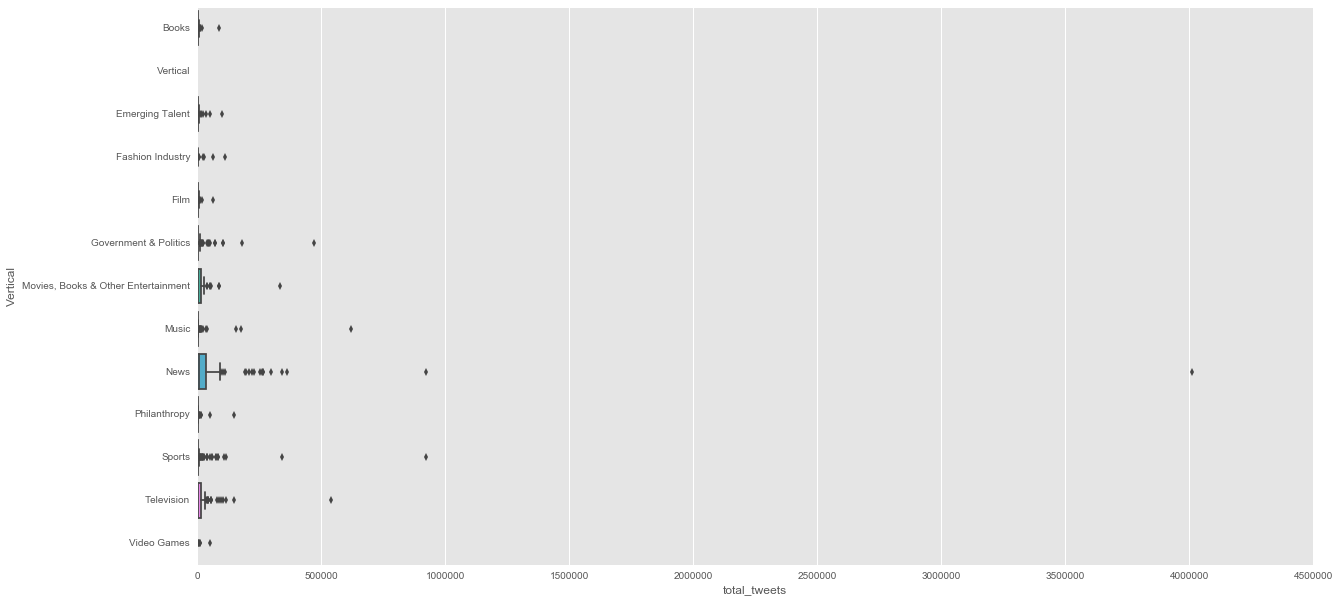

In [113]:
plt.figure(figsize=(20,10))

sns.boxplot(y="Vertical", x="total_tweets", data=df_topline_info);

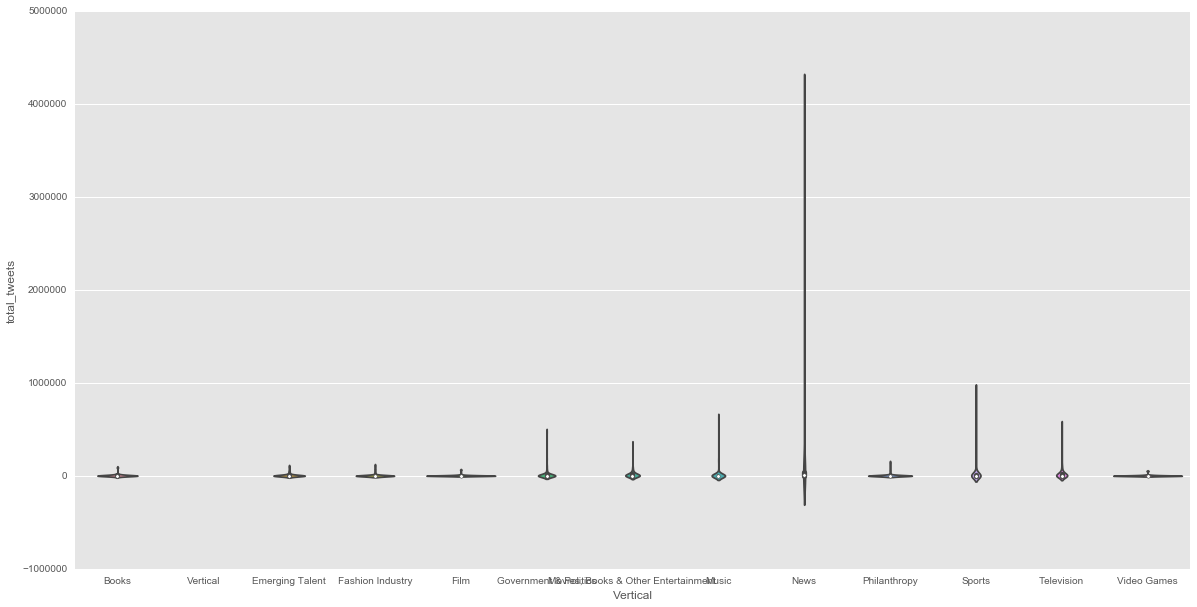

In [114]:
plt.figure(figsize=(20,10))

sns.violinplot(x="Vertical", y="total_tweets", data=df_topline_info);

Shows the Data is highly skewed for news

## Analyzing VITs trend across verticals

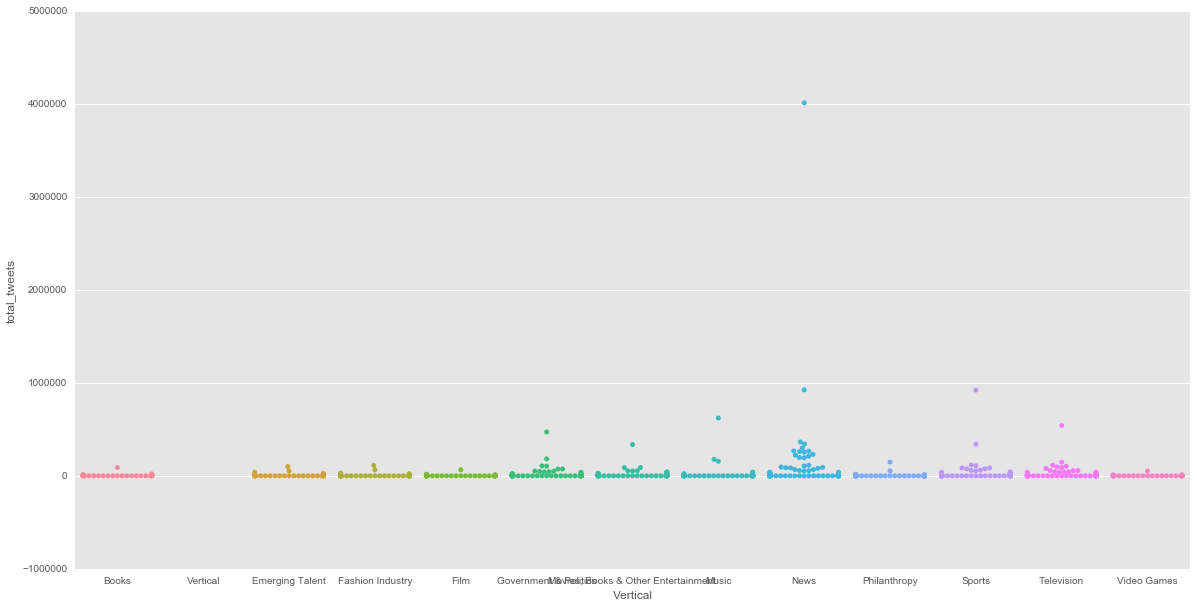

In [127]:
plt.figure(figsize=(20,10))

sns.swarmplot(x="Vertical", y="total_tweets",     data=df_topline_info);

## Count of Tweets across verticals

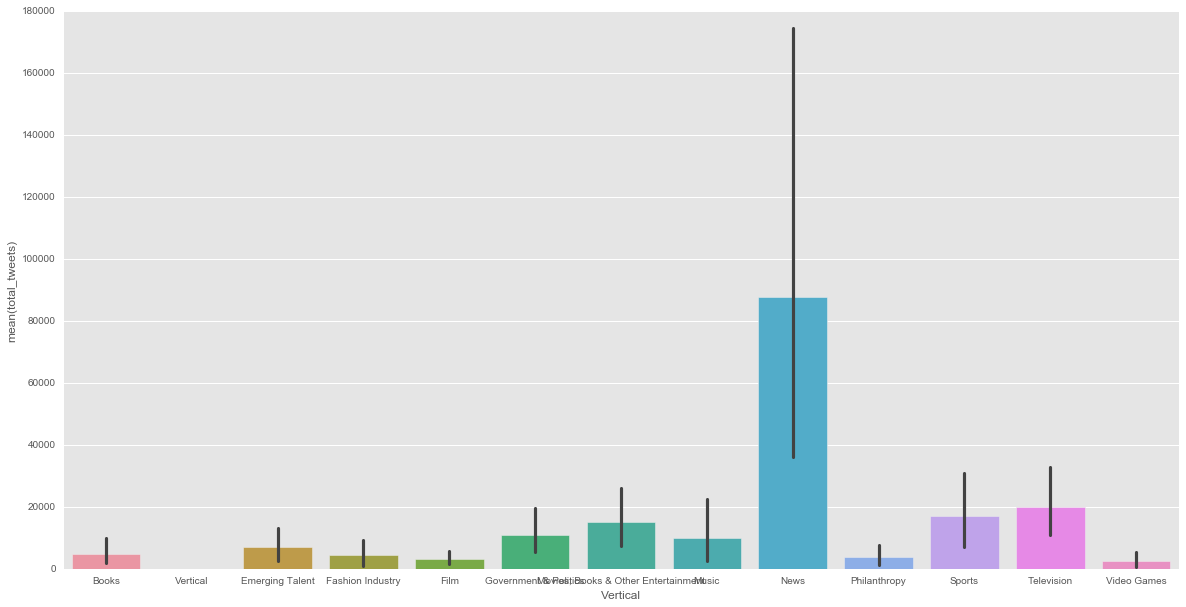

In [119]:
plt.figure(figsize=(20,10))
sns.barplot(x="Vertical", y="total_tweets", data=df_topline_info);

## Trend across verticals and Markets

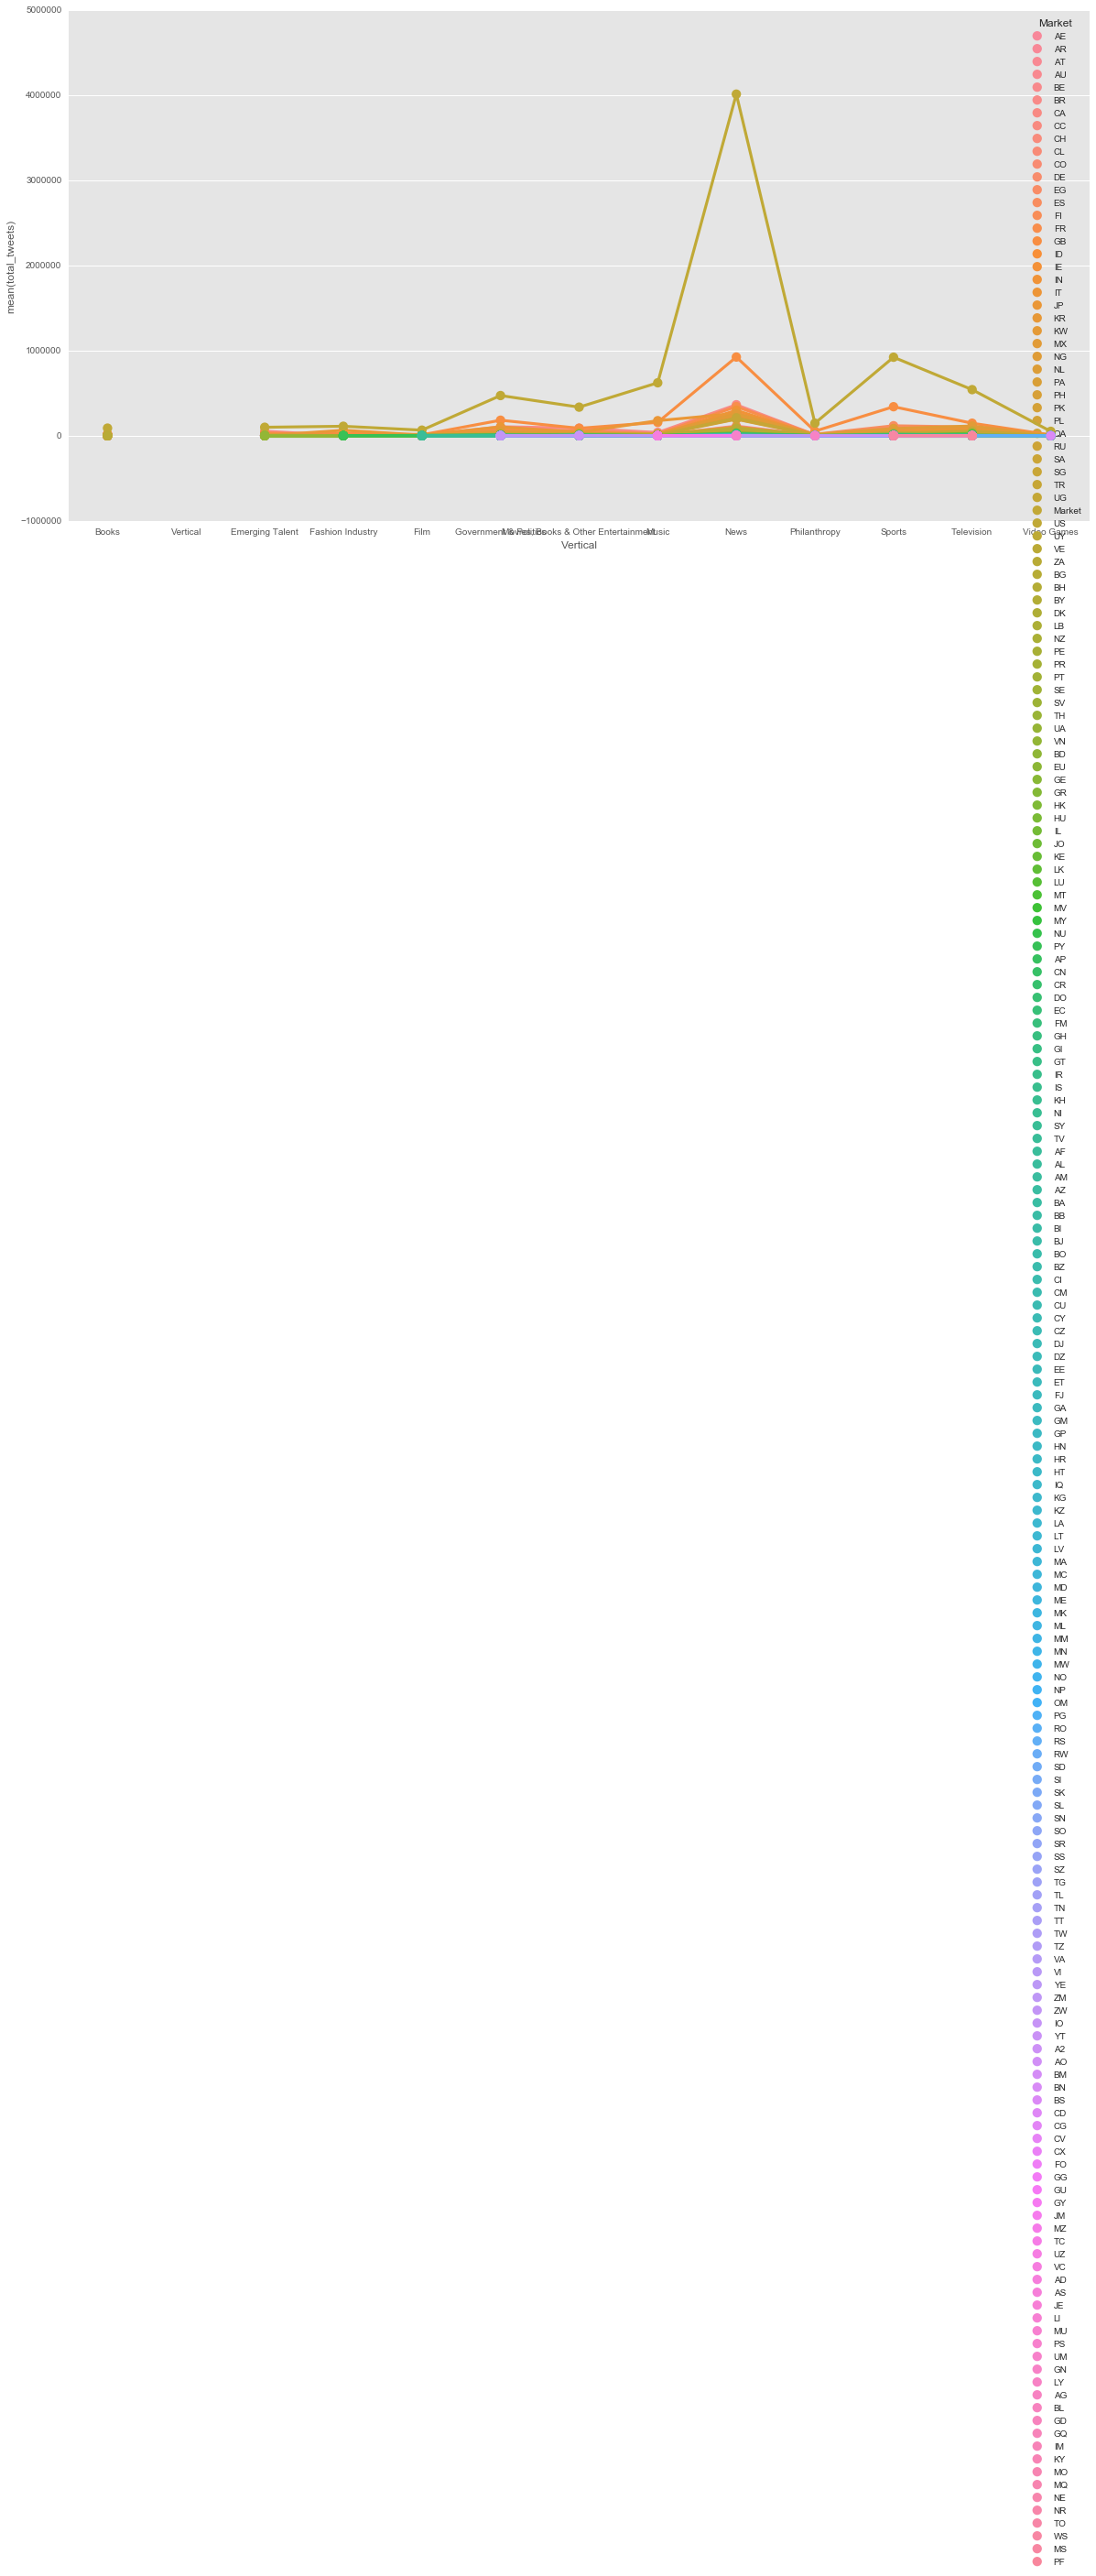

In [123]:
plt.figure(figsize=(20,10))
sns.pointplot(x="Vertical", y="total_tweets", hue="Market", data=df_topline_info);

In [125]:
df_topline_info.head()

,Market,Vertical,count_days,days_tweeted,total_vits,total_tweeting_vits,total_tweets
0,AE,Books,41.0,40.0,4.0,3.0,12956.0
1,AR,Books,41.0,41.0,4.0,4.0,3611.0
2,AT,Books,41.0,32.0,1.0,1.0,70.0
3,AU,Books,41.0,41.0,16.0,14.0,548.0
4,BE,Books,41.0,40.0,1.0,0.0,1074.0


        Analyzing Total_Tweeting_VITS

1.0      233
2.0      101
0.0       78
3.0       62
4.0       57
        ... 
262.0      1
259.0      1
243.0      1
241.0      1
144.0      1
Name: total_tweeting_vits, dtype: int64

In [141]:
#df[ (df.BuiltInYear < 1900) & (df.Size > 1500) ]
df_topline_US = df_topline_info[(df_topline_info.Market == 'US')]

## Analysis for the US Market

In [142]:
df_topline_US

,Market,Vertical,count_days,days_tweeted,total_vits,total_tweeting_vits,total_tweets
38,US,Books,41.0,41.0,729.0,673.0,89180.0
80,US,Emerging Talent,41.0,41.0,660.0,653.0,99325.0
137,US,Fashion Industry,41.0,41.0,1011.0,870.0,111008.0
202,US,Film,41.0,41.0,1623.0,1015.0,65370.0
344,US,Government & Politics,41.0,41.0,6053.0,5355.0,471647.0
...,...,...,...,...,...,...,...
655,US,News,41.0,41.0,25796.0,23726.0,4010861.0
748,US,Philanthropy,41.0,41.0,1394.0,1255.0,146966.0
889,US,Sports,41.0,41.0,13774.0,11343.0,921631.0
993,US,Television,41.0,41.0,9088.0,7630.0,541054.0


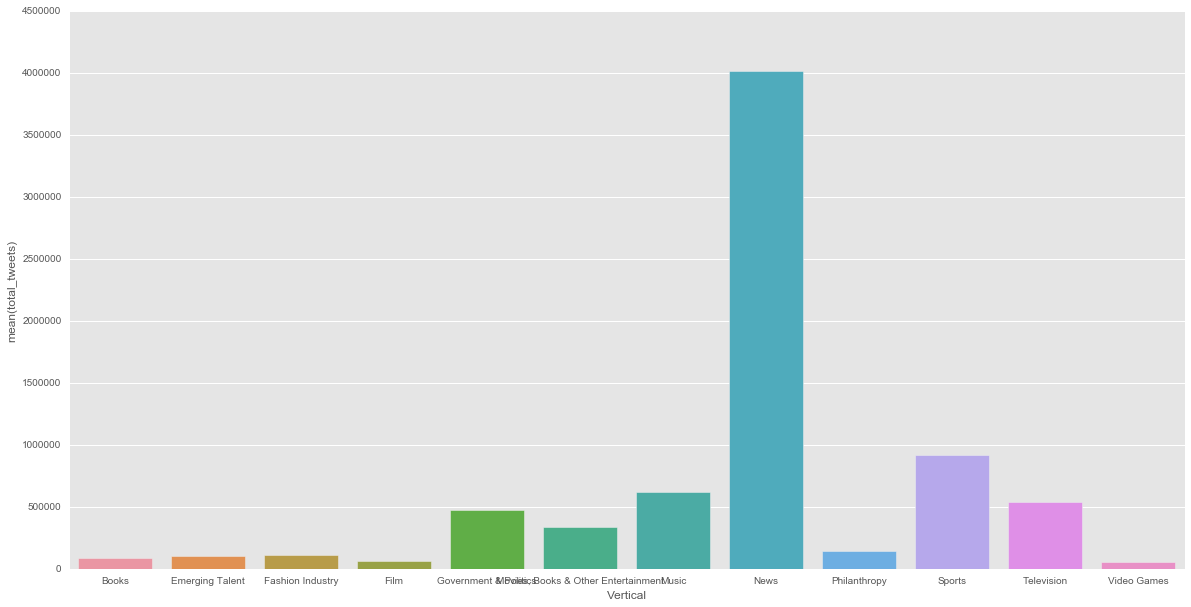

In [144]:
plt.figure(figsize=(20,10))
sns.barplot(x="Vertical", y="total_tweets", data=df_topline_US);

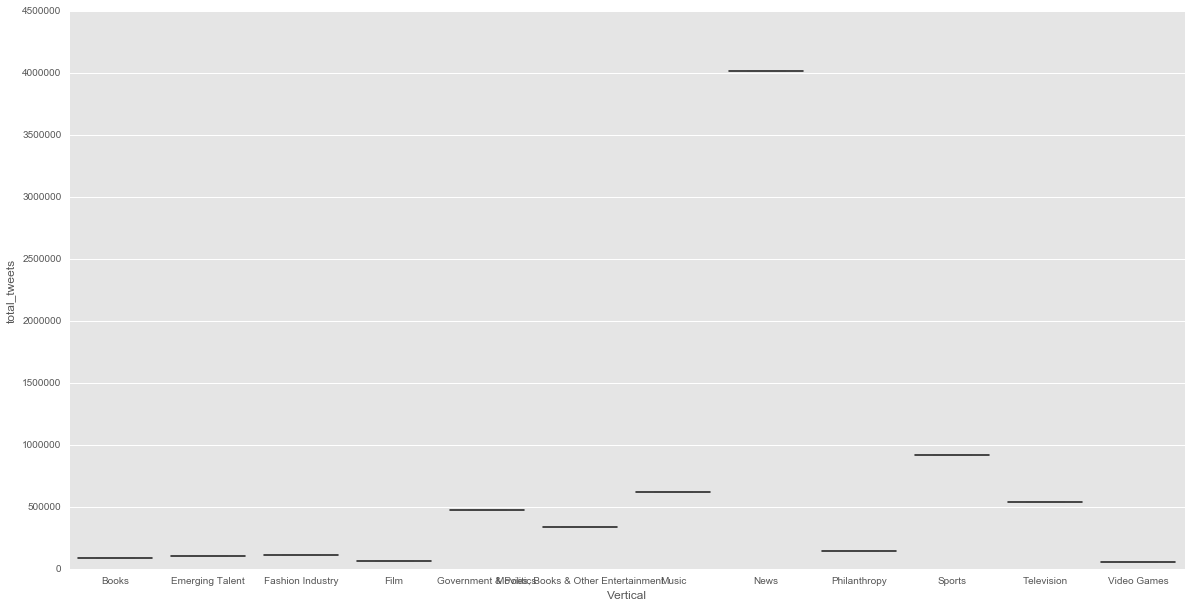

In [145]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Vertical", y="total_tweets",  data=df_topline_US);

## Total Tweeting VITS in the US Market across Verticals

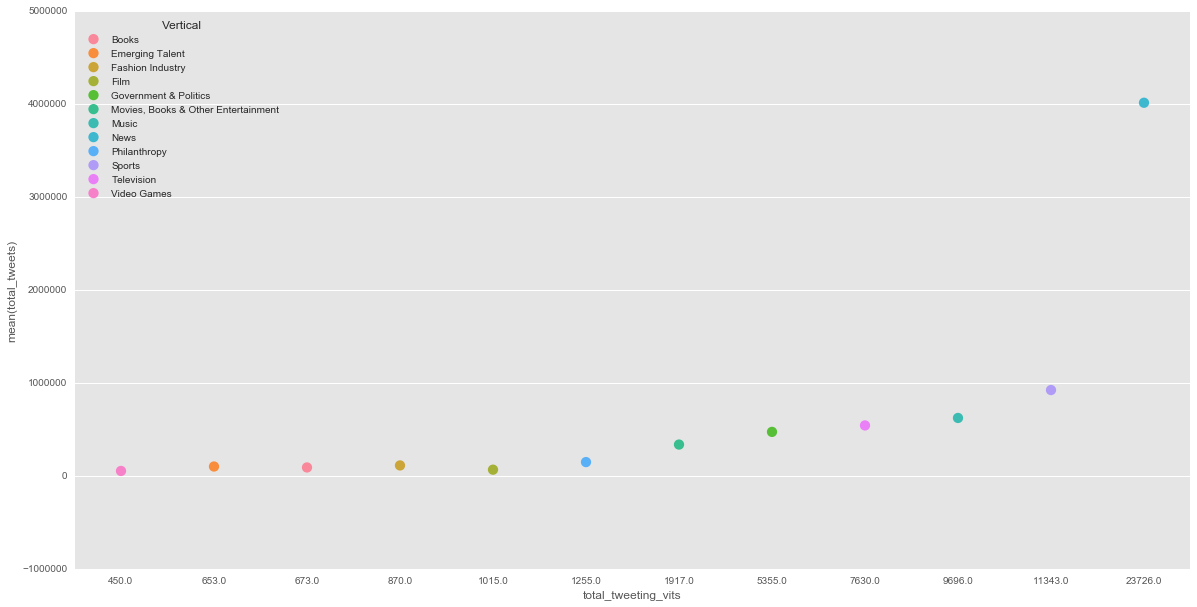

In [146]:
plt.figure(figsize=(20,10))
sns.pointplot(x="total_tweeting_vits", y="total_tweets",hue='Vertical', data=df_topline_US);

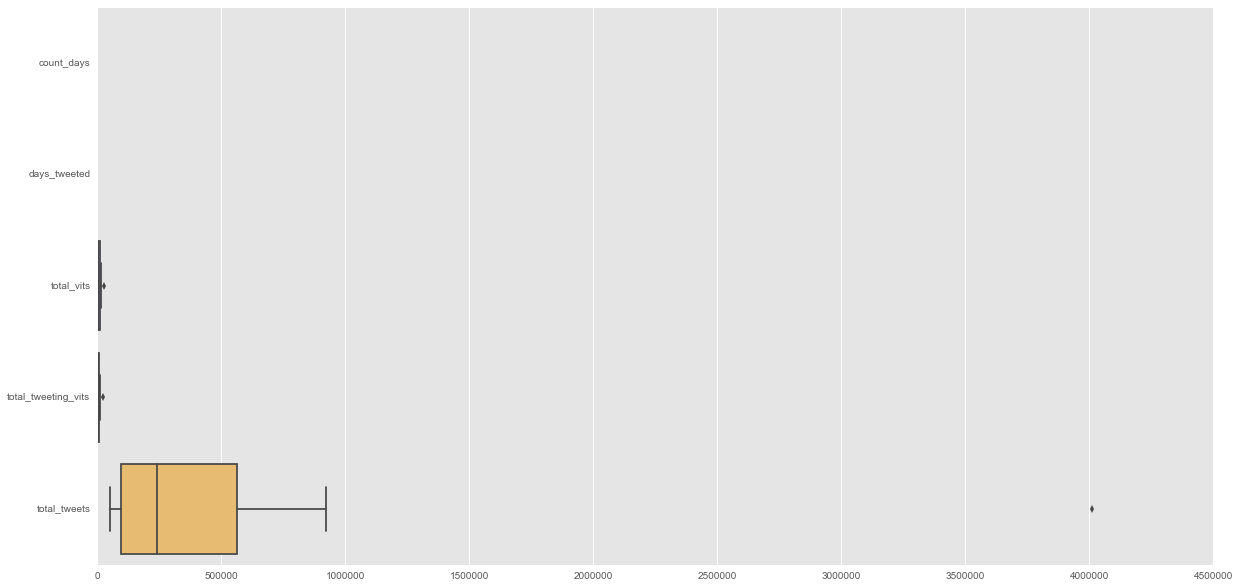